In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pdf = sns.load_dataset('penguins')
pdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
pdf.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
pdf.dtypes[pdf.dtypes=='object']

species    object
island     object
sex        object
dtype: object

In [5]:
strcols = pdf.dtypes[pdf.dtypes == 'object'].index.tolist()
strcols

['species', 'island', 'sex']

In [6]:
numcols = pdf.dtypes[pdf.dtypes != 'object'].index.tolist()
numcols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

## find missing entries in each column

In [7]:

pdf.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
pdf.shape[0]

344

In [9]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

-- Fill all missing values

In [10]:
for col in numcols:
  pdf[col]= pdf[col].fillna(pdf[col].mean())

In [11]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.000000
bill_depth_mm        0.000000
flipper_length_mm    0.000000
body_mass_g          0.000000
sex                  3.197674
dtype: float64

In [12]:
pdf2 = pdf[:]
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [13]:
pdf2.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [14]:
 pdf2.sex.mode().values[0]

'Male'

In [15]:
pdf2.sex= pdf2.sex.fillna(pdf2.sex.mode().values[0])


In [16]:
100*pdf2.isna().sum()/pdf2.shape[0]

species              0.0
island               0.0
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

In [17]:
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


## convert Categorical varibales to numericals 


|species|oldvalue| |A|B|C||
|--|--|--|--|--|--|--|
|A|0||1|0|0|A present|
|B|1||0|1|0|B present|
|C|2||0|0|1|C present|
|B|1||0|1|0|B present|
|B|1||0|1|0|B present|
|A|0||1|0|0|A present|
|C|2||0|0|1|C present|
|A|0||1|0|0|A present|


-- Dropping first category

|species|oldvalue| ||B|C||
|--|--|--|--|--|--|--|
|A|0|||0|0|A present|
|B|1|||1|0|B present|
|C|2|||0|1|C present|
|B|1|||1|0|B present|
|B|1|||1|0|B present|
|A|0|||0|0|A present|
|C|2|||0|1|C present|
|A|0|||0|0|A present|


In [18]:
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [19]:
pdf2.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [20]:
pdf3 = pdf2.copy()

In [21]:
pdf3.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

-- Extract Train and test dataset

In [22]:
X= pdf3.drop('body_mass_g',axis=1)
y= pdf3.body_mass_g.values.reshape(-1,1)

In [23]:
X.shape,y.shape

((344, 6), (344, 1))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25, random_state=1234
)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((258, 6), (86, 6), (258, 1), (86, 1))

## OneHotEncoding using SKlearn



In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [29]:
dir(encoder)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_X',
 '_compute_drop_idx',
 '_fit',
 '_get_feature',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_transform',
 '_validate_keywords',
 'categories',
 'categories_',
 'drop',
 'drop_idx_',
 'dtype',
 'fit',
 'fit_transform',
 'get_feature_names',
 'get_params',
 'handle_unknown',
 'inverse_transform',
 'set_params',
 'sparse',
 'transform']

In [30]:
encoder.get_feature_names()

array(['x0_Adelie', 'x0_Chinstrap', 'x0_Gentoo', 'x1_Biscoe', 'x1_Dream',
       'x1_Torgersen', 'x2_32.1', 'x2_33.1', 'x2_34.1', 'x2_34.4',
       'x2_34.6', 'x2_35.0', 'x2_35.1', 'x2_35.2', 'x2_35.3', 'x2_35.5',
       'x2_35.6', 'x2_35.7', 'x2_35.9', 'x2_36.0', 'x2_36.2', 'x2_36.3',
       'x2_36.4', 'x2_36.5', 'x2_36.6', 'x2_36.7', 'x2_36.8', 'x2_36.9',
       'x2_37.0', 'x2_37.2', 'x2_37.3', 'x2_37.5', 'x2_37.6', 'x2_37.7',
       'x2_37.8', 'x2_37.9', 'x2_38.1', 'x2_38.2', 'x2_38.3', 'x2_38.5',
       'x2_38.6', 'x2_38.7', 'x2_38.8', 'x2_38.9', 'x2_39.0', 'x2_39.2',
       'x2_39.3', 'x2_39.5', 'x2_39.6', 'x2_39.7', 'x2_39.8', 'x2_40.1',
       'x2_40.2', 'x2_40.3', 'x2_40.5', 'x2_40.6', 'x2_40.7', 'x2_40.8',
       'x2_40.9', 'x2_41.1', 'x2_41.3', 'x2_41.4', 'x2_41.5', 'x2_41.6',
       'x2_41.7', 'x2_41.8', 'x2_42.0', 'x2_42.1', 'x2_42.2', 'x2_42.3',
       'x2_42.4', 'x2_42.5', 'x2_42.6', 'x2_42.8', 'x2_42.9', 'x2_43.2',
       'x2_43.3', 'x2_43.4', 'x2_43.5', 'x2_43.6', 'x2_4

In [31]:
encoder.transform(X_train).shape

(258, 292)

## Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((258, 6), (258, 1), (86, 6), (86, 1))

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

ValueError: ignored

In [35]:
c = lr_model.intercept_

AttributeError: ignored

In [36]:
m = lr_model.coef_

AttributeError: ignored

In [37]:
c,m

NameError: ignored

In [38]:
X_train.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'sex'],
      dtype='object')

In [39]:
dfcoeff = pd.DataFrame({'col':X_train.columns,'coeff':m[0]})
dfcoeff

NameError: ignored

In [40]:
dfcoeff['imp']=  dfcoeff.coeff/dfcoeff.coeff.abs().max()
dfcoeff

NameError: ignored

In [41]:
dfcoeff['imp']=  np.sqrt((dfcoeff.coeff/dfcoeff.coeff.abs().max())**2)
dfcoeff.sort_values('imp',ascending=False)

NameError: ignored

In [ ]:
y_learnt_mf = lr_model.predict(X_train)
y_learnt_mf[:5]

array([[3653.34524979],
       [4798.65403491],
       [5239.32718657],
       [3448.5821616 ],
       [3341.32666373]])

In [ ]:
y_train[:5]

array([[3800.],
       [4850.],
       [5300.],
       [3400.],
       [3700.]])

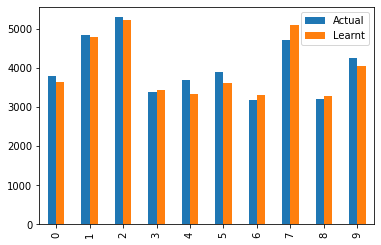

In [ ]:
df22 = pd.DataFrame({'Actual': y_train[:,0],
                     'Learnt': y_learnt_mf[:,0]})
df22.head(10).plot(kind='bar')

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
mse_train_mf = mse(y_train , y_learnt_mf)
mse_train_mf

79310.48056213827

In [ ]:
y_pred = lr_model.predict(X_test)
y_pred[:5]

array([[3314.50731546],
       [5341.6684005 ],
       [4066.34004363],
       [3978.49293668],
       [3482.11132601]])

In [ ]:
mse_test_mf = mse(y_test,y_pred)
mse_test_mf

114315.35770517406

# R2 score

In [ ]:
mse_base = 802.2336451400918**2
mse_base

643578.8213947586

In [ ]:

1-(mse_test_mf/mse_base)

0.8223755134492605

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score_mf = r2_score(y_test,y_pred)
r2_score_mf

0.8223754690254201